In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [200]:
block_size = 3 #context length
X, Y = [], []

for w in words:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

yuheng
diondre
xavien
jori
juanluis
erandi
phia
samatha
phoenix
emmelynn
hollan
hollis
callalily
adelayde
josephyne
weldon
kayle
ragnar
colbie
taveon
aki
peyten
kevari
joella
mecca
egan
justyce
taliyah
hayley
alleah
kymberlynn
parrish
houstyn
jamaya
ahmod
nivin
milli
cristiana
jaimee
mitchell
nairah
lorena
gentrie
torrion
savian
benjamine
airess
knute
sultana
danai
azzan
issabelle
abrahim
aislyn
aerys
malaiya
kieon
ayansh
berklee
emmakate
avaneesh
amenadiel
renardo
brekken
kamry
wylin
trixie
breslynn
bianka
mordchai
haoyu
frankie
josselin
saila
kionna
jennings
arlington
jupiter
aleisha
kemorah
denisse
zada
kaydynce
bari
darya
ellieanne
gretel
mahnoor
aryo
miles
evalise
igor
thoren
hector
anuel
emmerie
erian
blakeleigh
madina
fatumata
amberle
kessa
rukaya
dimitry
conlin
diary
giavonni
kyrin
kesean
addie
immanuel
caedyn
tyreik
marty
makelle
nahshon
brantley
bryli
evella
westley
maciah
rayann
aizah
sloane
future
aiden
jahniya
karder
emerlee
kwabena
harfateh
camren
enrico
mikiyas
treasure


In [9]:
C = torch.randn((27,2,))

In [19]:
emb = C[X] # embedding

In [20]:
W1 = torch.randn((6,100))
b1 = torch.randn(100) #bias 

In [22]:
emb[:, 0, :] #embedding of first word

tensor([[-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [ 0.0505,  0.4408],
        [ 0.2377, -0.9232],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [ 0.3011,  0.9886],
        [ 1.7192,  0.4761],
        [-0.2534,  0.3143],
        [ 0.3314, -0.4255],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [ 1.3375,  0.5215],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.2534,  0.3143],
        [-1.5521,  0.6424],
        [ 1.3375,  0.5215],
        [-0.6315,  0.5956],
        [ 0.0505,  0.4408],
        [ 1.7192,  0.4761],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-0.3967,  1.2245],
        [-1.5521,  0.6424],
        [ 0.3011,  0.9886],
        [ 0.3634, -0.1626],
        [-2.6775, -1.6390]])

In [26]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [29]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [31]:
a = torch.arange(18)

In [33]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [36]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [37]:
a.storage()

/var/folders/g5/8lbznvrn3f967tr8_4g5wz1m0000gn/T/ipykernel_30092/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [45]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #hidden layer for 32 examples

In [47]:
W2 = torch.randn([100, 27])
b2 = torch.randn(27)

In [48]:
logits = h @ W2 + b2

In [49]:
logits.shape

torch.Size([32, 27])

In [50]:
counts = logits.exp()

In [51]:
prob = counts / counts.sum(1, keepdims=True)

In [52]:
prob[torch.arange(32), Y]

tensor([4.6781e-01, 2.5363e-10, 8.4246e-06, 8.9840e-01, 3.8001e-02, 1.6635e-07,
        2.4545e-08, 3.1992e-01, 4.3181e-09, 2.1826e-04, 1.5872e-11, 4.1739e-04,
        1.7560e-10, 8.8745e-07, 3.9654e-09, 2.2117e-07, 3.9740e-12, 4.6796e-08,
        3.7690e-18, 9.4077e-09, 6.7170e-08, 7.1925e-07, 1.6773e-10, 3.1286e-05,
        6.1385e-08, 5.7123e-07, 3.9503e-09, 8.6829e-12, 3.1438e-06, 4.0344e-19,
        8.9081e-10, 5.3189e-07])

In [53]:
loss = -prob[torch.arange(32), Y].log().mean()

In [57]:
loss = F.cross_entropy(logits,Y)

In [114]:
# Setup
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

# Number of parameters in total
sum(p.nelement() for p in parameters)  # Output: 3481

3481

In [115]:
for p in parameters: 
    p.requires_grad = True

In [116]:
p

tensor([ 0.6626, -0.8950,  2.2376,  0.8060,  0.0653,  0.4381, -1.5407, -0.7609,
         0.2706,  1.5744,  0.6606, -0.2164, -0.1578, -0.3894,  1.0943, -0.0033,
         0.7768, -0.5078, -1.1358, -0.0590,  0.3792, -0.2928,  1.3779, -0.2003,
        -0.3707,  0.0968,  0.5662], requires_grad=True)

In [129]:
lre = torch.linspace(-3, 0, 10000)
lrs = 10**lre

In [141]:
lri = []
lossi = []
for i in range(10000):

    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32, ))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
    logits = h @ W2 + b2                      
    loss = F.cross_entropy(logits, Y[ix])
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # # track stats
    # lri.append(lr.item())
    # lossi.append(loss.item())


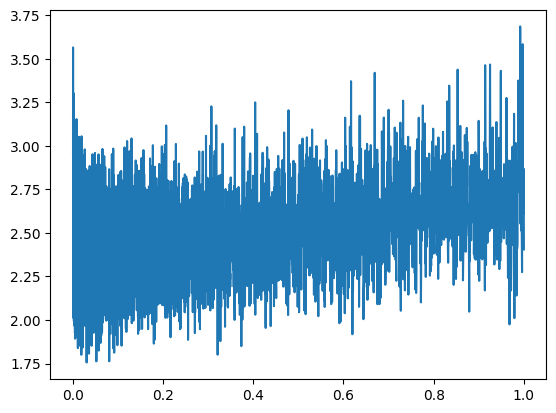

In [137]:
plt.plot(lri, lossi)

In [142]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
logits = h @ W2 + b2                      
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3401, grad_fn=<NllLossBackward0>)

In [143]:
# Build the dataset
def build_dataset(words):
    block_size = 3  # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [193]:
# Setup
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

# Number of parameters in total
sum(p.nelement() for p in parameters)  # Output: 3481

11897

In [194]:
for p in parameters: 
    p.requires_grad = True

In [195]:
lri = []
lossi = []
stepi = []

In [196]:
for i in range(50000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
    logits = h @ W2 + b2                      
    loss = F.cross_entropy(logits, Ytr[ix])
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.5315821170806885


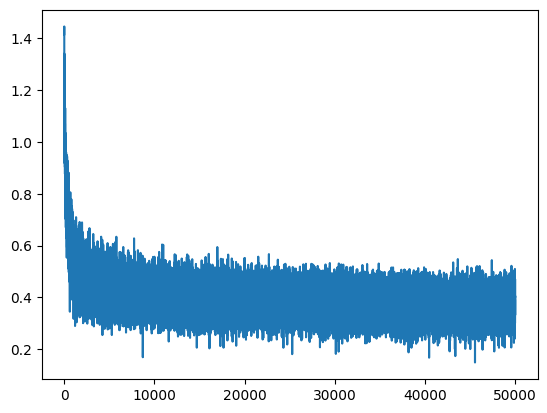

In [197]:
plt.plot(stepi, lossi)

In [199]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
logits = h @ W2 + b2                      
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3951, grad_fn=<NllLossBackward0>)

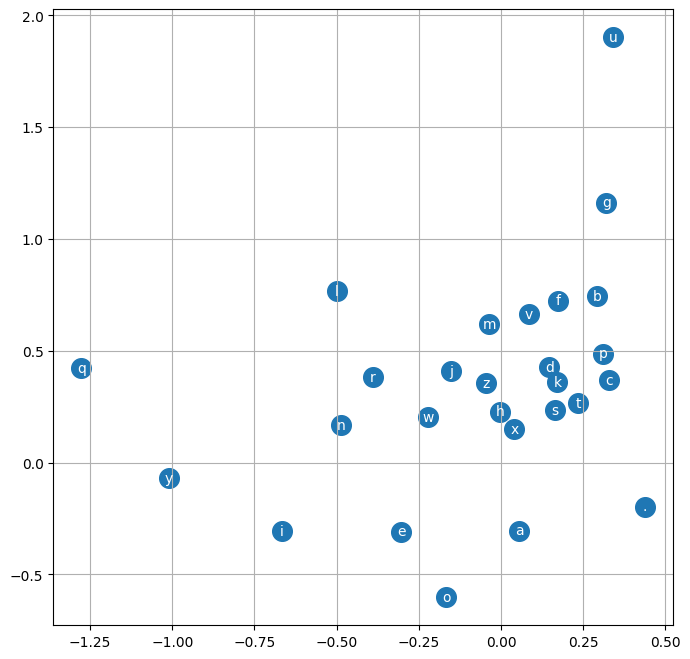

In [184]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i],
             ha="center", va="center", color='white')
plt.grid('minor')


In [201]:
# Sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size  # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]  # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))


carli.
fatori.
rafiigri.
remill.
kassin.
jazon.
addie.
arti.
aqui.
arrikia.
chaiir.
asleig.
dalm.
foli.
quintzi.
lil.
aliig.
quiste.
ogiiaryii.
fatei.
